# **Final Project - Heart Disease Prediction**

### **Team Members (Group-6)**:
- Layanika Vinay Saravanan - 8934459
- Priyanka Chitikela - 8909667

### **Problem Statement**

Coronary Heart Disease (CHD) remains a leading cause of morbidity and mortality worldwide, posing challenges to public health systems and individual well-being. Early identification of individuals at high risk is crucial for preventing severe outcomes through timely interventions like lifestyle modifications, medical treatments, and resource prioritization. However, the complex interplay of multiple risk factors, including age, blood pressure, cholesterol levels, diabetes, and lifestyle behaviors, complicates this process. 

This project aims to develop a machine learning-based predictive model to classify individuals into CHD risk categories using demographic, biometric, and clinical data. By identifying key predictors, addressing class imbalance, and providing actionable insights, the project seeks to enhance early detection, reduce healthcare costs, and improve patient outcomes.


### **About Dataset**:

The dataset contains 3,674 entries with 16 features, focusing on predicting coronary heart disease (CHD) risk. Key demographic attributes include age, sex, and education. Lifestyle factors, such as smoking status and cigarettes per day, are included alongside medical history like diabetes, hypertension, and stroke prevalence. Biometric measurements include total cholesterol, systolic and diastolic blood pressure, BMI, heart rate, and glucose levels. The target variable, CHDRisk, is binary (yes/no) but imbalanced, with more "no" cases. Some columns have missing values, which require preprocessing. The dataset combines categorical and numerical data, making it suitable for machine learning classification models.

### **Importing Necessary Libraries**

**Import libraries for data manipulation, visualization, and machine learning**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

### **Loading and Exploring the Dataset**

**Load the dataset and preview the first few rows**

In [2]:
data = pd.read_csv(r'C:\Users\Layanika.V.S\Desktop\Fall24\FML24\Final Project\Heart_Disease (1).csv')
print(data.head())

      sex  age  education smokingStatus  cigsPerDay  BPMeds  prevalentStroke  \
0    male   39          4            no           0       0                0   
1  female   46          2            no           0       0                0   
2    male   48          1           yes          20       0                0   
3  female   61          3           yes          30       0                0   
4  female   46          3           yes          23       0                0   

   prevalentHyp diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0       no      195  106.0   70.0  26.97         80       77   
1             0       no      250  121.0   81.0  28.73         95       76   
2             0       no      245  127.5   80.0  25.34         75       70   
3             1       no      225  150.0   95.0  28.58         65      103   
4             0       no      285  130.0   84.0  23.10         85       85   

  CHDRisk  
0      no  
1      no  
2      no  
3 

**Display basic information about the dataset to understand its structure**

In [3]:
print(data.isnull().sum())

sex                11
age                 0
education           0
smokingStatus      13
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
CHDRisk             0
dtype: int64


In [4]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3674 entries, 0 to 3673
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              3663 non-null   object 
 1   age              3674 non-null   int64  
 2   education        3674 non-null   int64  
 3   smokingStatus    3661 non-null   object 
 4   cigsPerDay       3674 non-null   int64  
 5   BPMeds           3674 non-null   int64  
 6   prevalentStroke  3674 non-null   int64  
 7   prevalentHyp     3674 non-null   int64  
 8   diabetes         3674 non-null   object 
 9   totChol          3674 non-null   int64  
 10  sysBP            3674 non-null   float64
 11  diaBP            3674 non-null   float64
 12  BMI              3674 non-null   float64
 13  heartRate        3674 non-null   int64  
 14  glucose          3674 non-null   int64  
 15  CHDRisk          3674 non-null   object 
dtypes: float64(3), int64(9), object(4)
memory usage: 459.4+ KB
N

### **EDA - Exploratory Data Analysis:**

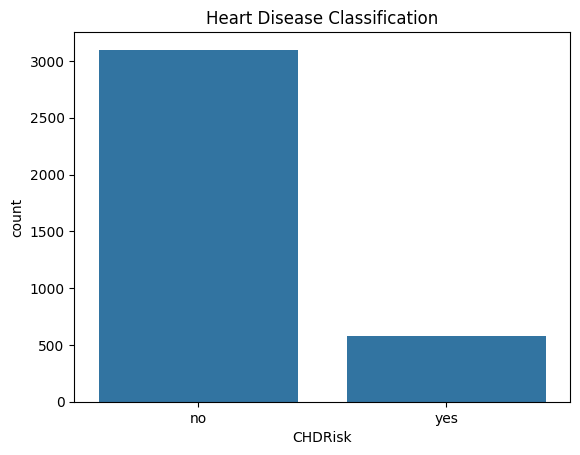

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot for target variable
sns.countplot(x='CHDRisk', data=data)
plt.title('Heart Disease Classification')
plt.show()

**Interpretation of the Distribution of CHD Risk Graph**:

* The graph shows the count of individuals in two categories of CHDRisk:
    * 0: No risk of coronary heart disease (CHD).
    * 1: At risk of coronary heart disease (CHD).
* The majority of individuals (over 3,000) are in the CHDRisk = 0 category, indicating no risk of CHD.
* A smaller group (under 700) falls into the CHDRisk = 1 category, representing individuals at risk.
* This imbalance can lead to bias in machine learning models toward predicting the majority class (CHDRisk = 0).

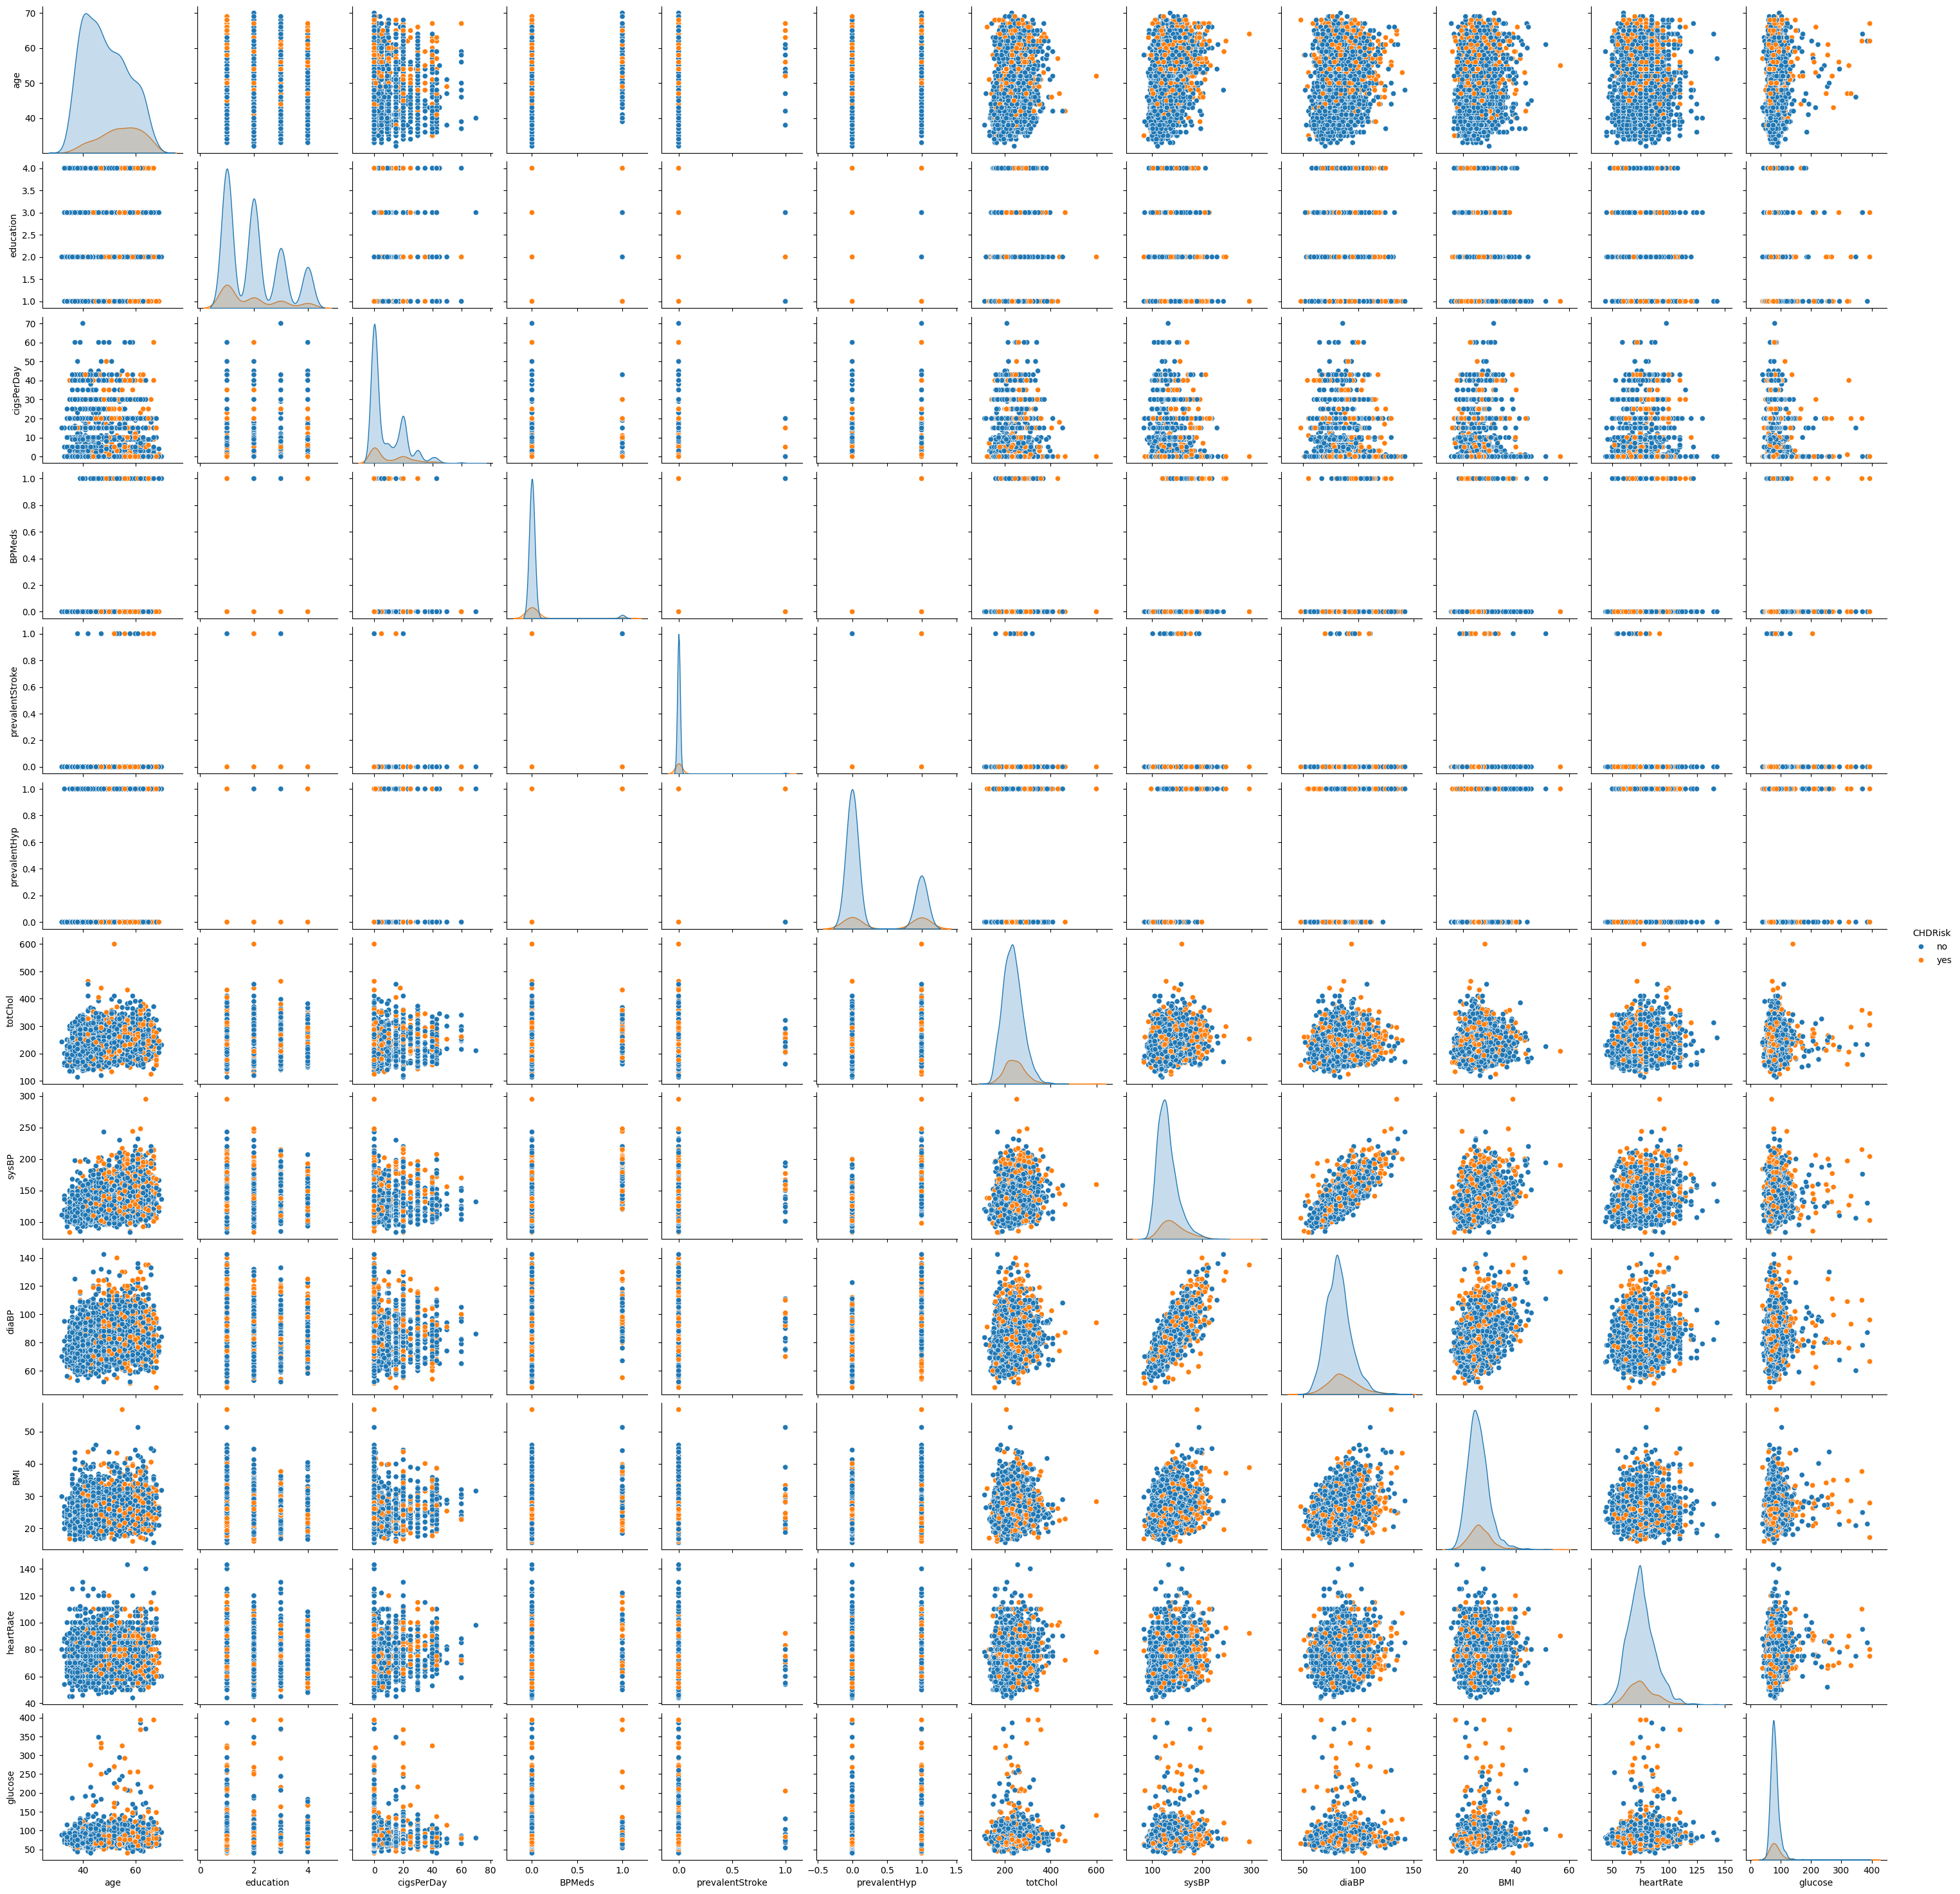

In [6]:
sns.pairplot(data, hue='CHDRisk')
plt.show()

A pairplot provides a matrix of scatterplots and histograms to visualize pairwise relationships and distributions of numerical features. In this pairplot, the features are compared, and the target variable CHDRisk is used for color coding (CHDRisk = 0 for blue and CHDRisk = 1 for orange).

**Key Observations from the Pairplot**:

1. **Distributions**:
   - Features like age, sysBP, and BMI show clear variability and differences between CHDRisk = 0 and CHDRisk = 1.
   - Features such as BPMeds and prevalentStroke are heavily skewed toward 0, indicating most individuals do not have these conditions.

2. **Relationships**:
   - **sysBP and diaBP**: Strong positive correlation, reflecting typical blood pressure dynamics.
   - **age and CHDRisk**: Older individuals are more likely to have CHDRisk = 1.
   - **BMI and CHDRisk**: Higher BMI is associated with a greater risk of CHD.
   - **glucose and CHDRisk**: Elevated glucose levels are more common among those with CHDRisk = 1.

3. **CHDRisk Patterns**:
   - Orange points (CHDRisk = 1) are more dispersed in sysBP, diaBP, and age, indicating these features may strongly predict CHD risk.
   - Features like education show no significant distinction between the classes.

4. **Implications for Modeling**:
   - **Key Features**: sysBP, age, BMI, and glucose are strong predictors and should be prioritized.
   - **Weak Features**: Variables like education and BPMeds may have limited predictive value.
   - Non-linear models like Random Forests or Gradient Boosting may better handle overlaps in feature distributions.

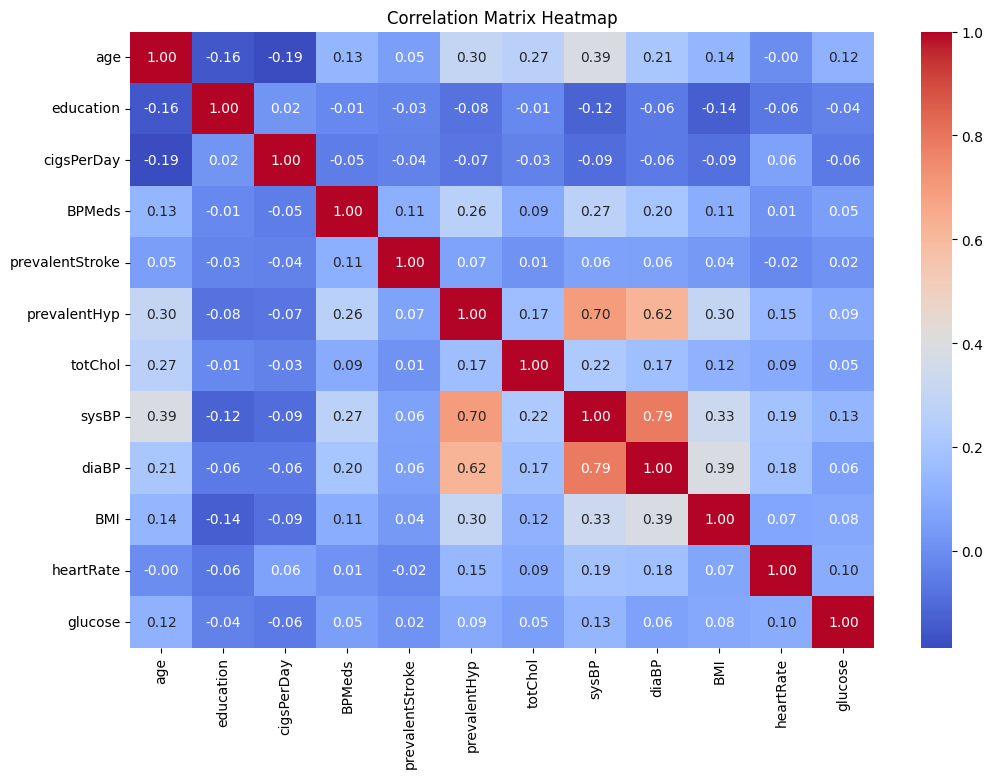

In [7]:
# Filter numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

**Key Observations from the Correlation Matrix Heatmap**

1. **Strong Positive Correlations**:
   - sysBP and diaBP (~0.79): Systolic and diastolic blood pressure are highly correlated, reflecting their physiological relationship.
   - prevalentHyp and sysBP (~0.70): A history of hypertension is strongly associated with higher systolic blood pressure.

2. **Moderate Positive Correlations**:
   - age and sysBP (~0.39): Older individuals tend to have higher systolic blood pressure.
   - age and prevalentHyp (~0.30): Older age is linked with a higher prevalence of hypertension.
   - totChol and age (~0.27): Cholesterol levels tend to increase slightly with age.

3. **Weak or No Correlation**:
   - Features like education, cigsPerDay, and prevalentStroke have weak correlations with most other variables, indicating limited direct influence.

4. **Implications for Modeling**:
   - Strongly correlated features, such as sysBP and diaBP, may provide redundant information. Dimensionality reduction or careful selection is required to avoid multicollinearity.
   - Features like age, sysBP, BMI, and prevalentHyp may serve as important predictors due to their moderate to strong relationships with key health indicators.

### **Data Preprocessing**

**Handling missing values, encoding categorical data, and scaling numerical features**

In [8]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

# Fill missing values with the median for numerical columns
data.fillna(data.median(numeric_only=True), inplace=True)

# Optionally, drop rows with missing values
# data.dropna(inplace=True)

Missing values per column:
 sex                11
age                 0
education           0
smokingStatus      13
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
CHDRisk             0
dtype: int64


In [9]:
# drop rows with missing values
data.dropna(inplace=True)

**Defining the target variable**

In [10]:
# Define the target variable
y = data['CHDRisk']  # Assuming 'target' is the column name for the label

# Drop the target column from the dataset to create features
X = data.drop(columns=['CHDRisk'])

# Display the first few rows of features and target
print("Features (X):\n", X.head())
print("Target (y):\n", y.head())

Features (X):
       sex  age  education smokingStatus  cigsPerDay  BPMeds  prevalentStroke  \
0    male   39          4            no           0       0                0   
1  female   46          2            no           0       0                0   
2    male   48          1           yes          20       0                0   
3  female   61          3           yes          30       0                0   
4  female   46          3           yes          23       0                0   

   prevalentHyp diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  
0             0       no      195  106.0   70.0  26.97         80       77  
1             0       no      250  121.0   81.0  28.73         95       76  
2             0       no      245  127.5   80.0  25.34         75       70  
3             1       no      225  150.0   95.0  28.58         65      103  
4             0       no      285  130.0   84.0  23.10         85       85  
Target (y):
 0     no
1     no
2     no
3 

**Encoding using Dummies**

In [11]:
X_encoded = pd.get_dummies(X, drop_first=True)

**Scaling Features**

Features were scaled using StandardScaler to standardize them with a mean of 0 and a standard deviation of 1, ensuring all features are on the same scale.

In [12]:
from sklearn.preprocessing import StandardScaler

# Initialize a StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
X_scaled = scaler.fit_transform(X_encoded)

# Convert scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.columns)
print("Scaled Features (X):\n", X_scaled_df.head())

Scaled Features (X):
         age  education  cigsPerDay    BPMeds  prevalentStroke  prevalentHyp  \
0 -1.236597   1.973967   -0.762182 -0.176227         -0.07605     -0.671516   
1 -0.417496   0.016881   -0.762182 -0.176227         -0.07605     -0.671516   
2 -0.183468  -0.961662    0.914163 -0.176227         -0.07605     -0.671516   
3  1.337719   0.995424    1.752336 -0.176227         -0.07605      1.489168   
4 -0.417496   0.995424    1.165615 -0.176227         -0.07605     -0.671516   

    totChol     sysBP     diaBP       BMI  heartRate   glucose  sex_male  \
0 -0.947563 -1.197277 -1.081416  0.292359   0.355471 -0.199268  1.116245   
1  0.300388 -0.516495 -0.159361  0.726858   1.608944 -0.241382 -0.895861   
2  0.186938 -0.221490 -0.243184 -0.110046  -0.062353 -0.494064  1.116245   
3 -0.266862  0.799682  1.014165  0.689826  -0.898002  0.895690 -0.895861   
4  1.094539 -0.108027  0.092109 -0.663045   0.773295  0.137642 -0.895861   

   smokingStatus_yes  diabetes_yes  
0        

**Key Observations**:

* Negative values indicate below-average feature values, while positive values indicate above-average values.
* Binary features like sex_male and smokingStatus_yes are standardized but retain near-binary patterns.

In [13]:
# Check shapes of features and target
print(f"Shape of Features (X): {X_scaled_df.shape}")
print(f"Shape of Target (y): {y.shape}")

Shape of Features (X): (3652, 15)
Shape of Target (y): (3652,)


### **Splitting Data for Model Training**

**Split the dataset into training and testing sets**

In [14]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42, stratify=y)

# Check the shapes of the splits
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

Training Features Shape: (2921, 15)
Testing Features Shape: (731, 15)
Training Target Shape: (2921,)
Testing Target Shape: (731,)


### **Model Training**

The Linear Regression model is used to predict CHDRisk (converted to numeric values: 1 for "yes" and 0 for "no").

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Convert non-numeric values in y_train and y_test to numeric (if applicable)
# For example, if your target variable has 'yes' and 'no', we replace them with 1 and 0
y_train = y_train.replace({'yes': 1, 'no': 0})
y_test = y_test.replace({'yes': 1, 'no': 0})

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R², MSE, MAE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the results
print("R² Score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

R² Score: 0.11224613831981356
Mean Squared Error (MSE): 0.11685514310150058
Mean Absolute Error (MAE): 0.2398565933421994


**Evaluation Metrics**:

* R² Score: 0.11
    * Indicates that the model explains only 11% of the variance in the target variable, suggesting a poor fit for the data.
* Mean Squared Error (MSE): 0.117
    * Represents the average squared difference between predicted and actual values. Lower values are better.
* Mean Absolute Error (MAE): 0.24
    * Indicates the average absolute difference between predictions and actual values.

**Insights**:

* The low R² score shows that Linear Regression is not suitable for this problem, likely due to the binary nature of the target variable and its non-linear relationships with features.

**Random Forest Classifier**

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

print("Model training completed!")

Model training completed!


**Logistic Regression**

In [17]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression
logreg_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
logreg_model.fit(X_train, y_train)

print("Logistic Regression training completed!")

Logistic Regression training completed!


**SVM Model**

In [18]:
from sklearn.svm import SVC

# Initialize SVM
svm_model = SVC(random_state=42, kernel='linear', probability=True)

# Train the model
svm_model.fit(X_train, y_train)

print("SVM training completed!")

SVM training completed!


**KNN Model**

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can experiment with n_neighbors

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

print("KNN training completed")

KNN training completed


### **Model Performance Evaluation**

**Random Forest Classifier**

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)  # Use 1 for the positive class
recall = recall_score(y_test, y_pred, pos_label=1)  # Use 1 for the positive class
f1 = f1_score(y_test, y_pred, pos_label=1)  # Use 1 for the positive class

# Print metrics
print("Random Forest Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Display detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Random Forest Model Performance:
Accuracy: 0.85
Precision: 0.67
Recall: 0.09
F1 Score: 0.16

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92       617
           1       0.67      0.09      0.16       114

    accuracy                           0.85       731
   macro avg       0.76      0.54      0.54       731
weighted avg       0.83      0.85      0.80       731



**Interpretation**

* The model achieved an accuracy of 85%, indicating good performance on the test set. However, accuracy alone can be misleading due to class imbalance.
* The model performs well in predicting the majority class (CHDRisk = 0), with precision of 85% and recall of 99%.
* For the minority class (CHDRisk = 1), the performance drops significantly, with a recall of only 9% and an F1 score of 0.16, highlighting the model's struggle to identify individuals at risk.
* The macro average (unweighted mean of metrics across classes) is low for recall (0.54) and F1 score (0.54), reflecting poor balance in performance between classes.
* The weighted average (accounting for class imbalance) shows better results due to the dominance of the majority class.

**Conclusion**

* The model is biased towards the majority class (CHDRisk = 0) due to class imbalance.
* While the overall accuracy is high, the recall for the minority class (CHDRisk = 1) is too low for the model to be considered effective for identifying at-risk individuals.

**Logistic Regression** 

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression

# Fit the Logistic Regression model (assuming X_train and y_train are already defined)
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_logreg)
precision = precision_score(y_test, y_pred_logreg, pos_label=1)  # Use 1 as the positive label
recall = recall_score(y_test, y_pred_logreg, pos_label=1)  # Use 1 as the positive label
f1 = f1_score(y_test, y_pred_logreg, pos_label=1)  # Use 1 as the positive label

# Print metrics
print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Display detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Model Performance:
Accuracy: 0.86
Precision: 0.77
Recall: 0.15
F1 Score: 0.25

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       617
           1       0.77      0.15      0.25       114

    accuracy                           0.86       731
   macro avg       0.82      0.57      0.59       731
weighted avg       0.85      0.86      0.82       731



**Interpretation**

* The model achieved an accuracy of 86%, slightly better than the Random Forest model. However, accuracy alone is insufficient due to class imbalance.
* High precision (86%) and recall (99%) indicate that the model predicts the majority class effectively.
* The recall for the minority class is 15%, meaning the model misses most individuals at risk.
* The F1 score of 0.25 reflects the model's limited effectiveness in balancing precision and recall for the minority class.
* Macro average recall (0.57) shows imbalance in performance between classes.
* Weighted average metrics are higher due to dominance of the majority class.

**Conclusion**

* While Logistic Regression performs better in precision and F1 score for the minority class compared to Random Forest, it still struggles with recall.
* The model is biased towards the majority class, making it less effective for identifying high-risk individuals.

**SVM Model**

In [22]:
import warnings
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.svm import SVC

# Suppress all warnings
warnings.filterwarnings('ignore')

# Fit the SVM model (assuming X_train and y_train are already defined)
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, pos_label=1)  # Change 'yes' to 1
recall = recall_score(y_test, y_pred_svm, pos_label=1)  # Change 'yes' to 1
f1 = f1_score(y_test, y_pred_svm, pos_label=1)  # Change 'yes' to 1

# Print metrics
print("SVM Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Display detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

SVM Model Performance:
Accuracy: 0.84
Precision: 0.00
Recall: 0.00
F1 Score: 0.00

Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.92       617
           1       0.00      0.00      0.00       114

    accuracy                           0.84       731
   macro avg       0.42      0.50      0.46       731
weighted avg       0.71      0.84      0.77       731



**Interpretation**

* The model achieved an accuracy of 84%, which seems high but is misleading due to its failure to predict the minority class (CHDRisk = 1).
* The model performs well for the majority class with precision (84%), recall (100%), and an F1 score of 0.92.
* The model entirely fails to predict the minority class (CHDRisk = 1), with precision, recall, and F1 score of 0.00.
* This suggests the model is biased towards the majority class and disregards the minority class entirely.
* Macro average metrics (precision: 0.42, recall: 0.50) reflect the severe imbalance in performance across classes.
* Weighted averages are skewed by the majority class, showing slightly better performance due to the large size of CHDRisk = 0.

**Conclusion**

* The SVM model is ineffective for identifying individuals at risk of CHD (CHDRisk = 1).
* It highlights the need for addressing class imbalance and possibly tuning SVM parameters (e.g., using a different kernel or class weighting).

**KNN**

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, pos_label=1)
recall = recall_score(y_test, y_pred_knn, pos_label=1)
f1 = f1_score(y_test, y_pred_knn, pos_label=1)

# Print metrics
print("KNN Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

KNN Model Performance:
Accuracy: 0.83
Precision: 0.38
Recall: 0.11
F1 Score: 0.16

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       617
           1       0.38      0.11      0.16       114

    accuracy                           0.83       731
   macro avg       0.61      0.54      0.54       731
weighted avg       0.78      0.83      0.79       731



**Interpretation**

* The model achieved an accuracy of 83%, which is reasonable but heavily influenced by the majority class (CHDRisk = 0).
* The model performs well for the majority class with precision (85%), recall (97%), and an F1 score of 0.91.
* The model struggles with the minority class, achieving only 11% recall and an F1 score of 0.16. This indicates that the model misses most instances of CHDRisk = 1.
* The macro average recall (0.54) and F1 score (0.54) reveal a poor balance between the classes.
* The weighted averages are higher due to the dominance of the majority class.

**Conclusion**

* The KNN model is biased towards the majority class and underperforms in identifying individuals at risk (CHDRisk = 1).
* The low precision and recall for the minority class limit its usefulness in real-world applications.

### **Model Interpretation and Insights**

In [24]:
# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the top features
print("Feature Importance:\n", feature_importance_df)

Feature Importance:
               Feature  Importance
7               sysBP    0.137490
9                 BMI    0.127470
0                 age    0.125110
11            glucose    0.122854
6             totChol    0.121238
8               diaBP    0.117746
10          heartRate    0.092414
2          cigsPerDay    0.052908
1           education    0.035582
12           sex_male    0.021318
5        prevalentHyp    0.018797
13  smokingStatus_yes    0.013011
3              BPMeds    0.006419
14       diabetes_yes    0.005124
4     prevalentStroke    0.002519


**Conclusion**

* **Focus on Key Features**: Features like sysBP, BMI, age, glucose, and totChol should be prioritized in model building and interpretation.
* **Potential Redundancy**: The strong importance of both sysBP and diaBP may indicate overlap; dimensionality reduction could be considered.
* **Insights for Interventions**: The importance of modifiable factors (e.g., BMI, glucose, cholesterol) highlights areas for preventive healthcare efforts.

**Feature Importance for Random Forest**

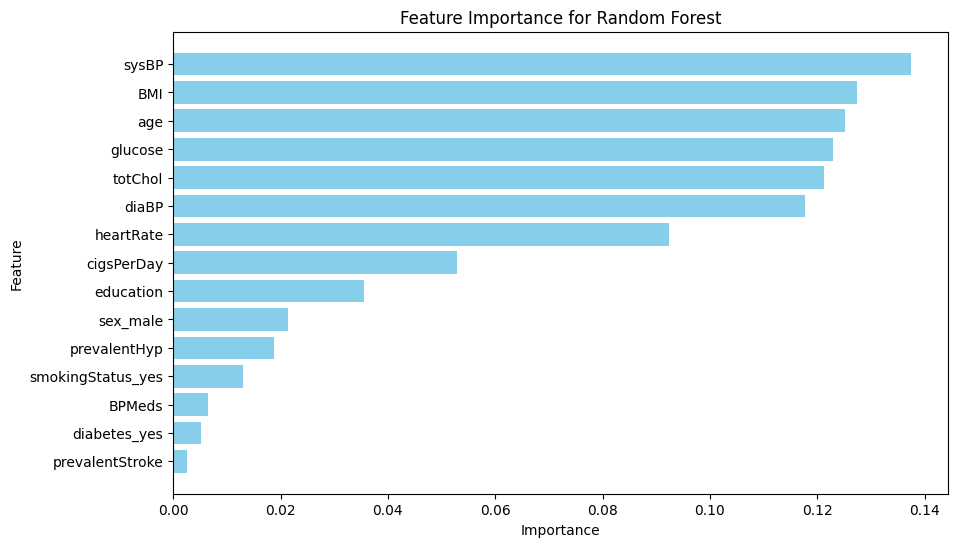

In [25]:
import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Random Forest')
plt.gca().invert_yaxis()
plt.show()

**Interpretation**

* sysBP (Systolic Blood Pressure) is the most important feature, highlighting its critical role in predicting CHDRisk.
* BMI (Body Mass Index), age, glucose, and totChol (Total Cholesterol) also show high importance, emphasizing the significance of these health metrics.
* diaBP (Diastolic Blood Pressure) and heartRate contribute moderately, reflecting their influence on cardiovascular health.
* Features like cigsPerDay, education, and prevalentHyp (Hypertension History) have lower importance but may still provide some predictive value.
* BPMeds (Blood Pressure Medications), diabetes_yes, and prevalentStroke contribute minimally, indicating less relevance in this dataset.

**Confusion Matrix for SVM Model**

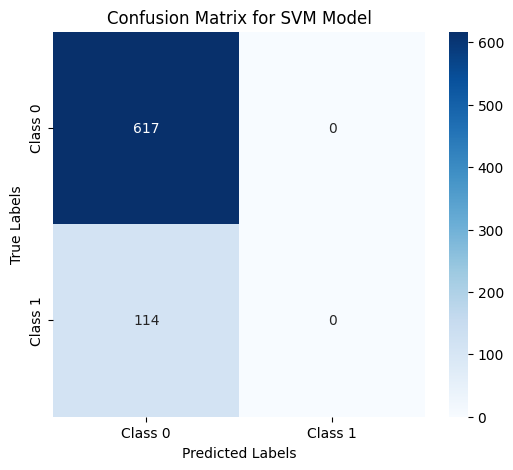

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure X_test is defined or use the transformed test set (e.g., after PCA or scaling)
# For example, if you are using the raw test set:
X_test_to_use = X_test  # Replace with X_test_2d if that's the correct variable

# Make predictions on the test set
y_pred = svm_model.predict(X_test_to_use)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix for SVM Model")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**Interpretation**

1. True Positives (Class 1 Predicted as Class 1):
    * Count: 0
    * The SVM model failed to correctly predict any instances of the minority class (CHDRisk = 1).

2. True Negatives (Class 0 Predicted as Class 0):
    * Count: 617
    * The model correctly classified all instances of the majority class (CHDRisk = 0).

3. False Positives (Class 0 Predicted as Class 1):
    * Count: 0
    * No false positives, indicating no instances of Class 0 were incorrectly classified as Class 1.

4. False Negatives (Class 1 Predicted as Class 0):
    * Count: 114
    * All instances of the minority class (CHDRisk = 1) were misclassified as Class 0.

**Insights**:

* The SVM model is heavily biased towards the majority class (CHDRisk = 0) and fails to predict any instances of the minority class (CHDRisk = 1).
* This imbalance reflects poor recall and F1 score for the minority class, rendering the model ineffective for identifying individuals at risk of CHD.

**ROC Curve for KNN**

Length of original y_test: 731
Length of y_pred_proba: 731
Length of cleaned y_test: 731
Length of cleaned y_pred_proba: 731
Unique values in y_test: [0 1]
Length of y_test_clean after dropping NaN: 731


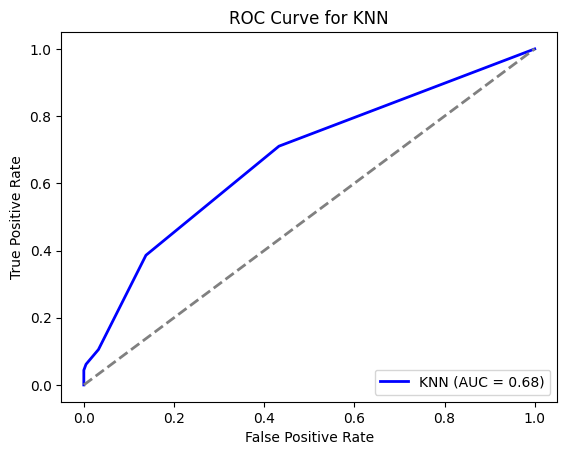

In [27]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Assuming your model is already trained and you are using KNN in this case
# Get the predicted probabilities for the positive class (class '1')
y_pred_proba = knn_model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1

# Ensure no NaN values in y_test by creating a mask for non-NaN values
mask = y_test.notna()  # Create a mask for non-NaN values
y_test_clean = y_test[mask]  # Cleaned y_test
y_pred_proba_clean = y_pred_proba[mask]  # Cleaned predicted probabilities

# Debugging: Print the lengths before and after cleaning
print(f"Length of original y_test: {len(y_test)}")
print(f"Length of y_pred_proba: {len(y_pred_proba)}")
print(f"Length of cleaned y_test: {len(y_test_clean)}")
print(f"Length of cleaned y_pred_proba: {len(y_pred_proba_clean)}")

# Debugging: Check the unique values in y_test
print(f"Unique values in y_test: {y_test_clean.unique()}")

# Drop any remaining NaN values in y_test_clean (if any)
y_test_clean = y_test_clean.dropna()

# Ensure y_pred_proba_clean matches the cleaned y_test_clean
y_pred_proba_clean = y_pred_proba_clean[:len(y_test_clean)]

# Debugging: Check after dropping NaN values
print(f"Length of y_test_clean after dropping NaN: {len(y_test_clean)}")

# Check if y_test_clean and y_pred_proba_clean have the same length and are non-empty
if len(y_test_clean) == 0 or len(y_pred_proba_clean) == 0:
    raise ValueError("y_test_clean or y_pred_proba_clean is empty. Check data cleaning process.")

# Check for NaN values in y_pred_proba_clean using numpy
if np.isnan(y_pred_proba_clean).sum() > 0:
    raise ValueError("y_pred_proba_clean contains NaN values. Please clean the data.")

# Check if y_pred_proba_clean contains probabilities, not binary class labels
if not np.all((y_pred_proba_clean >= 0) & (y_pred_proba_clean <= 1)):
    raise ValueError("y_pred_proba_clean should contain probabilities, not class labels.")

# Calculate the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_clean, y_pred_proba_clean, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'KNN (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend(loc="lower right")
plt.show()

**Interpretation**

* The Area Under the Curve (AUC) is 0.68, indicating that the KNN model has modest discriminatory power but struggles to effectively distinguish between CHDRisk = 0 and CHDRisk = 1.
* The ROC curve is only slightly above the diagonal (random classifier line), suggesting that the model performs marginally better than random guessing.
* The True Positive Rate (TPR) increases with the False Positive Rate (FPR), but the curve's shape indicates limited ability to identify positive cases (CHDRisk = 1).
* The low AUC and the flat curve segments reflect the challenge posed by the imbalance in the dataset, where CHDRisk = 1 is the minority class.

**ROC Curve for Logistic Regression**

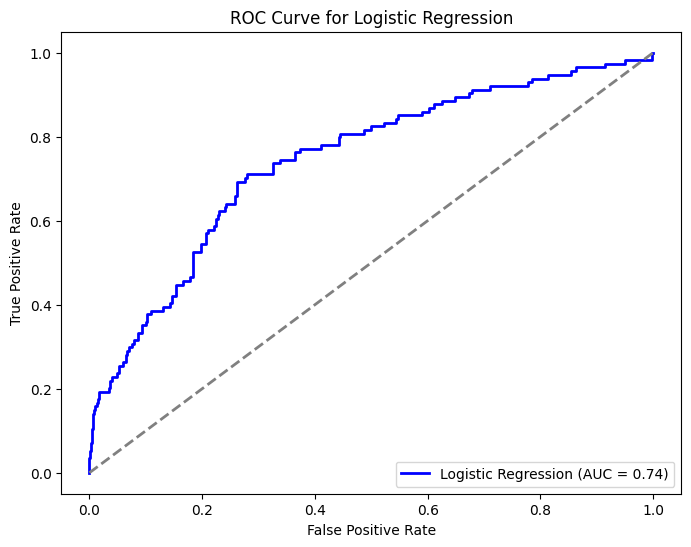

In [28]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class (class 1)
y_pred_proba = logreg_model.predict_proba(X_test)[:, 1]  # Probabilities for class '1'

# Compute the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
# Calculating ROC AUC
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

**Interpretation**

* The Area Under the Curve (AUC) is 0.74, indicating moderate discriminatory power of the logistic regression model in distinguishing between CHDRisk = 0 and CHDRisk = 1.
* The ROC curve is well above the diagonal line, showing the model performs better than random guessing but leaves room for improvement, especially for identifying minority class instances (CHDRisk = 1).
* The curve highlights that the model balances between False Positive Rate (FPR) and True Positive Rate (TPR), achieving reasonable sensitivity for positive cases.
* While logistic regression provides a straightforward and interpretable approach, its AUC of 0.74 suggests the need for enhancements to improve performance, particularly for imbalanced data.

### **Future Improvements:**

<u>Integration of More Complex Risk Factors:</u> Incorporate additional data sources such as genetic information, family history, and environmental factors to build a more comprehensive model for predicting CHD risk.

<u>Real-time Risk Assessment:</u> Develop a real-time prediction system that can be integrated into clinical workflows or mobile applications, providing healthcare professionals with immediate risk assessments for better decision-making.

<u>Personalized Risk Profiles:</u> Extend the model to generate personalized health risk profiles for individuals based on their lifestyle choices and health conditions, offering tailored prevention strategies.

<u>Collaboration with Healthcare Systems:</u> Partner with hospitals, clinics, or public health organizations to deploy the predictive model in real-world settings, validate its effectiveness, and gather feedback for further improvement.

<u>Dynamic Risk Assessment:</u> Develop a dynamic model that can update risk scores over time as new data becomes available, enabling healthcare systems to track changes in patients' health status and adjust preventive measures accordingly.

### **Conclusion**:

This project aimed to predict the risk of Coronary Heart Disease (CHD) using a machine learning approach, leveraging demographic, biometric, and clinical data. Multiple models, including Random Forest, Logistic Regression, Support Vector Machine (SVM), and k-Nearest Neighbors (KNN), were evaluated to determine their effectiveness.

Logistic Regression emerged as the best-performing model, achieving an Area Under the Curve (AUC) of 0.74 and an accuracy of 86%. However, all models struggled with imbalanced data, particularly in identifying high-risk individuals (CHDRisk = 1), as evidenced by low recall and F1 scores for the minority class. Feature importance analysis highlighted systolic blood pressure (sysBP), BMI, age, glucose, and cholesterol as the most significant predictors of CHD.

Despite moderate success, the models revealed limitations in handling class imbalance and non-linear relationships. Future improvements could include advanced techniques like oversampling, under-sampling, or synthetic data generation (e.g., SMOTE) to balance the dataset and the use of ensemble methods or deep learning for better performance.

Overall, the study provides valuable insights into CHD risk factors, underscores the importance of early detection, and highlights the need for tailored interventions to improve health outcomes. Further refinements to the model could enhance its applicability in real-world healthcare settings.